#                                                                            TITANIC: Machine Learning from Disaster

![](http://blog.ecocentro.es/wp-content/uploads/2015/07/5b8be34e82bee5b84719daeec62cd868_large.jpeg)

**Welcome!** 

I've done here all the basic steps you might need to solve a ML problem, such as EDA, feature engineering, encoding, simple model baseline, model assembly, parameter tunning and model evaluation. I hope this will help you with your further classification projects of this kind. If you like this, please *up-vote* and of course, I'll be glad if you drop me a comment in the section below.

I watched these two short videos to get some "business understanding" background:
*     Sinking of the Titanic: https://youtu.be/b0L_2jKEbA4
*     50 Insane Facts: https: https://youtu.be/Rqbsrj6-FgM

## LOAD LIBRARIES

In [1]:
# Basic
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Common Tools
from sklearn.preprocessing import LabelEncoder
from collections import Counter

#Algorithms
from sklearn import ensemble, tree, svm, naive_bayes, neighbors, linear_model, gaussian_process, neural_network
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

# Model
from sklearn.metrics import accuracy_score, f1_score, auc, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
#from sklearn.ensemble import VotingClassifier

#Configure Defaults
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Check versions

In [2]:
pd.__version__

'0.23.4'

In [3]:
np.__version__

'1.16.4'

In [4]:
sns.__version__

'0.9.0'

## LOAD DATA

In [5]:
train = pd.read_csv('../input/train.csv')

In [6]:
train.shape

(891, 12)

In [7]:
test = pd.read_csv('../input/test.csv')

In [8]:
test.shape

(418, 11)

### Check for imbalance class problem

Survival rate:  0.3838383838383838


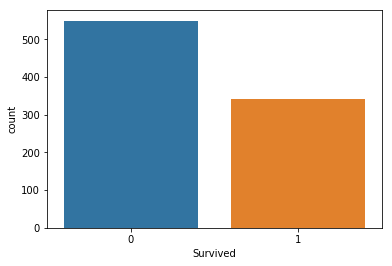

In [9]:
sns.countplot(x='Survived', data=train)
print("Survival rate: ", train.Survived.sum()/train.Survived.count())

## EDA

In [10]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [12]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
# Describe categorical features
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Hocking, Mrs. Elizabeth (Eliza Needs)",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


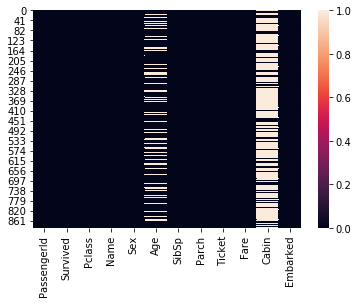

In [15]:
sns.heatmap(train.isnull())

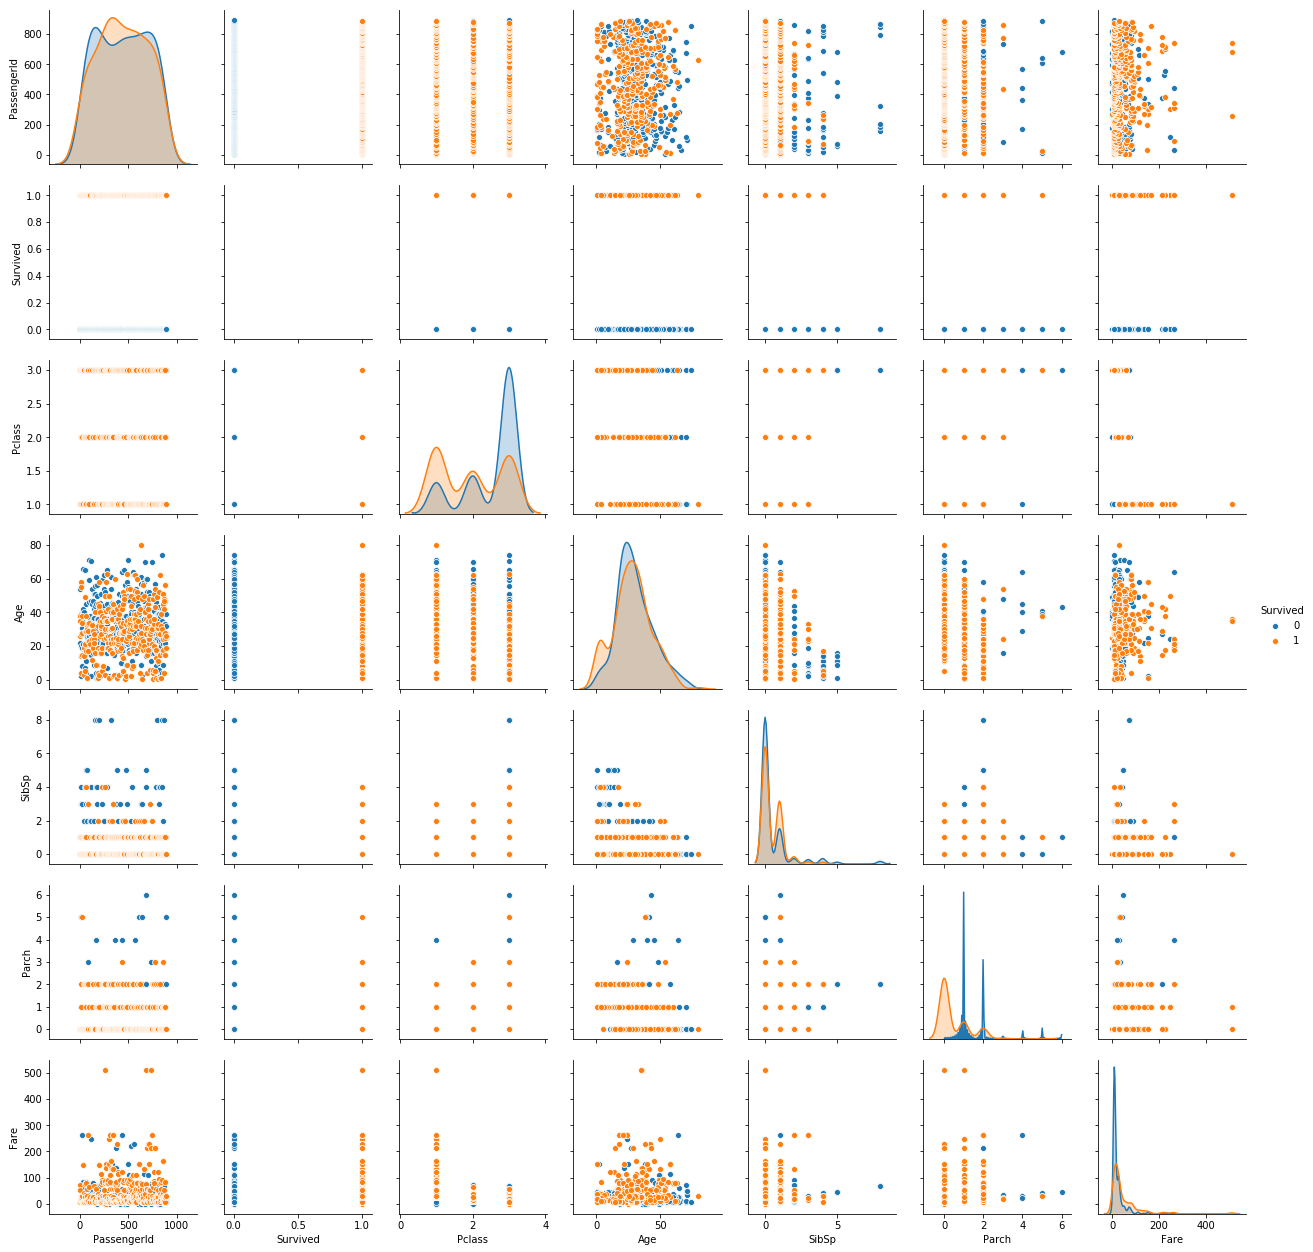

In [16]:
sns.pairplot(train, hue="Survived")

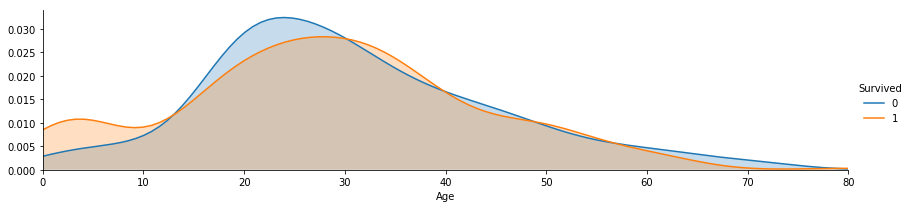

In [17]:
a = sns.FacetGrid(train, hue = 'Survived', aspect=4 )
a.map(sns.kdeplot, 'Age', shade= True )
a.set(xlim=(0, train['Age'].max()))
a.add_legend()

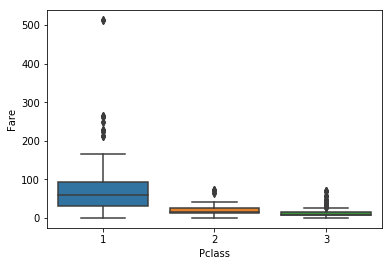

In [18]:
sns.boxplot(x="Pclass", y="Fare",data=train)

In [19]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [20]:
train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [21]:
train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [22]:
train[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


## DATA WRANGLING

### Outlier removal

In [23]:
q = train.Fare.quantile(0.99)
q

249.00622000000033

In [24]:
train = train[train['Fare'] < q]

### Concat data 

In [25]:
#Save Id for the submission at the very end.
Id = test['PassengerId']

In [26]:
#Get split marker
split = len(train)

In [27]:
#Merge into one dataset
data =  pd.concat(objs=[train, test], axis=0).reset_index(drop=True)

In [28]:
#We don't need the Id anymore now.
data.drop('PassengerId', axis=1, inplace=True)

In [29]:
data.shape

(1300, 11)

### Handle Nulls 

#### Age 

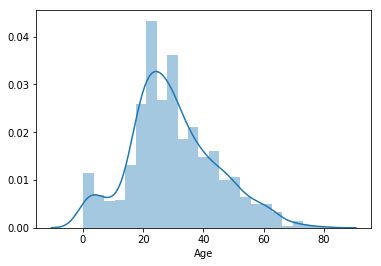

In [30]:
sns.distplot(data['Age'].dropna())

In [31]:
median = data["Age"].median()
std = data["Age"].std()
is_null = data["Age"].isnull().sum()
rand_age = np.random.randint(median - std, median + std, size = is_null)
age_slice = data["Age"].copy()
age_slice[np.isnan(age_slice)] = rand_age
data["Age"] = age_slice
data["Age"] = data["Age"].astype(int)

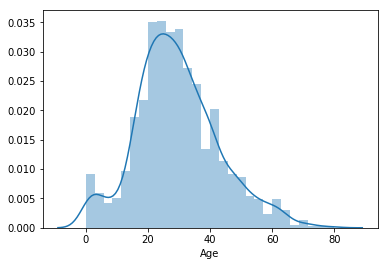

In [32]:
#Check
sns.distplot(data['Age'])

#### Others

In [33]:
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace = True)

In [34]:
data["Embarked"].isnull().sum()

0

In [35]:
data['Fare'].fillna(data['Fare'].mean(), inplace = True)

#### Cabin

In [36]:
data["CabinBool"] = (data["Cabin"].notnull().astype('int'))

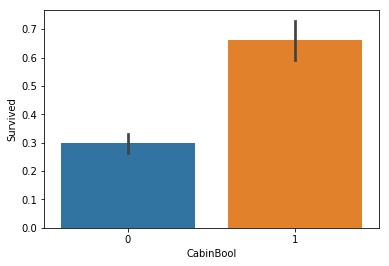

In [37]:
sns.barplot(x="CabinBool", y="Survived", data=data)

##### Deck

In [38]:
data['Deck'] = data.Cabin.str.extract('([a-zA-Z]+)', expand=False)
data[['Cabin', 'Deck']].sample(10)
data['Deck'] = data['Deck'].fillna('Z')
data = data.drop(['Cabin'], axis=1)

#### Embarked

In [39]:
data.groupby(['Embarked'])['Survived'].count()

Embarked
C    163
Q     77
S    642
Name: Survived, dtype: int64

#### Family

##### Family Size

In [40]:
data['FamilySize'] = data['SibSp'] + data['Parch']

##### Is Alone

In [41]:
data['IsAlone'] = 1 #default value

In [42]:
data['IsAlone'].loc[data['FamilySize'] > 0] = 0

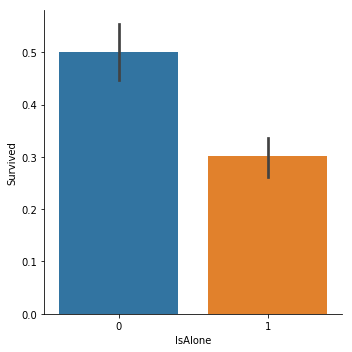

In [43]:
sns.factorplot(x="IsAlone", y="Survived", data=data, kind="bar")

#### Age

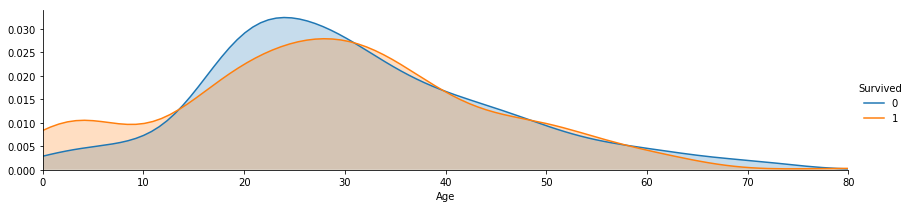

In [44]:
a = sns.FacetGrid(train, hue = 'Survived', aspect=4 )
a.map(sns.kdeplot, 'Age', shade= True )
a.set(xlim=(0, train['Age'].max()))
a.add_legend()

In [45]:
# Bucketize
bins = [-1, 13, 31, 60, 80]
labels = ['Child', 'Young Adult', 'Adult', 'Senior']
data['AgeBin'] = pd.cut(data["Age"], bins, labels = labels).astype('object')

In [46]:
#data['AgeBand'] = pd.cut(data['Age'], 5)
#data[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

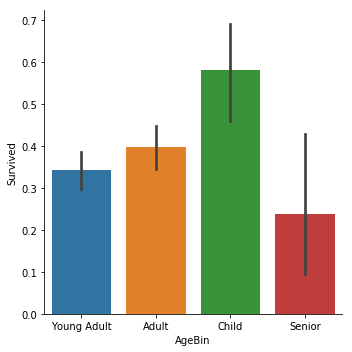

In [47]:
# Plot
sns.factorplot(x="AgeBin", y="Survived", data=data, kind="bar")

##### Is Baby

In [48]:
data['IsBaby'] = 0 #default value

In [49]:
data['IsBaby'].loc[data['Age'] <= 5] = 1

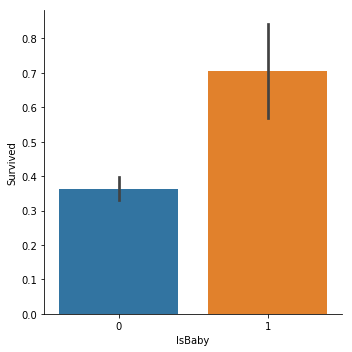

In [50]:
sns.factorplot(x="IsBaby", y="Survived", data=data, kind="bar")

##### Title

In [51]:
data['Title'] = data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [52]:
data['Title'] = data['Title'].replace(['Lady', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')  
data['Title'] = data['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
data['Title'] = data['Title'].replace('Mlle', 'Miss')
data['Title'] = data['Title'].replace('Ms', 'Miss')
data['Title'] = data['Title'].replace('Mme', 'Mrs')

In [53]:
data['Title'] = data['Title'].astype('object')

In [54]:
data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.694444
2,Mr,0.153996
3,Mrs,0.793651
4,Rare,0.285714
5,Royal,1.000000


#### Fare 

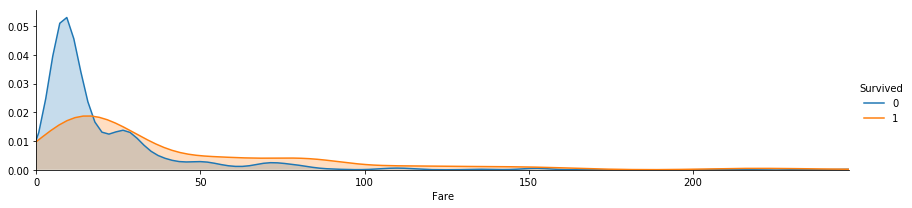

In [55]:
f = sns.FacetGrid(train, hue = 'Survived', aspect=4 )
f.map(sns.kdeplot, 'Fare', shade= True )
f.set(xlim=(0, train['Fare'].max()))
f.add_legend()

In [56]:
# Bucketize
bins = [-np.inf, 20, 30, 110, np.inf]
labels = ['Low', 'Mid', 'High', 'Extreme']
data['FareBin'] = pd.cut(data["Fare"], bins, labels = labels).astype('object')

In [57]:
#data['FareBand'] = pd.qcut(data['Fare'], 4)
#data[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

In [58]:
data.columns

Index(['Age', 'Embarked', 'Fare', 'Name', 'Parch', 'Pclass', 'Sex', 'SibSp',
       'Survived', 'Ticket', 'CabinBool', 'Deck', 'FamilySize', 'IsAlone',
       'AgeBin', 'IsBaby', 'Title', 'FareBin'],
      dtype='object')

## Baseline model

In [59]:
# To tincker around a bit
df = data

In [60]:
# Drop high cardinality
df = df.drop(['Ticket', 'Name', 'Fare'], axis=1)

In [61]:
from catboost import Pool, CatBoostClassifier, cv

#Split data
train = df[:split]
test = df[split:]

# Get variables for a model
x = train.drop(["Survived"], axis=1)
y = train["Survived"]

#Do train data splitting
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

#We will predict this value for a submission
test.drop(["Survived"], axis = 1, inplace=True)

cat_features = np.where(x.dtypes != float)[0]

cat = CatBoostClassifier(one_hot_max_size=7, iterations=21, random_seed=42, use_best_model=True, eval_metric='Accuracy', loss_function='Logloss')

cat.fit(X_train, y_train, cat_features = cat_features, eval_set=(X_test, y_test))
pred = cat.predict(X_test)

pool = Pool(X_train, y_train, cat_features=cat_features)
cv_scores = cv(pool, cat.get_params(), fold_count=10, plot=True)
print('CV score: {:.5f}'.format(cv_scores['test-Accuracy-mean'].values[-1]))
print('The test accuracy is :{:.6f}'.format(accuracy_score(y_test, cat.predict(X_test))))

Learning rate set to 0.393008
0:	learn: 0.8099291	test: 0.8361582	best: 0.8361582 (0)	total: 53.1ms	remaining: 1.06s
1:	learn: 0.8113475	test: 0.8531073	best: 0.8531073 (1)	total: 55.7ms	remaining: 529ms
2:	learn: 0.8283688	test: 0.8757062	best: 0.8757062 (2)	total: 57.9ms	remaining: 348ms
3:	learn: 0.8312057	test: 0.8757062	best: 0.8757062 (2)	total: 60.7ms	remaining: 258ms
4:	learn: 0.8283688	test: 0.8757062	best: 0.8757062 (2)	total: 62.9ms	remaining: 201ms
5:	learn: 0.8297872	test: 0.8757062	best: 0.8757062 (2)	total: 64.9ms	remaining: 162ms
6:	learn: 0.8269504	test: 0.8700565	best: 0.8757062 (2)	total: 66.7ms	remaining: 133ms
7:	learn: 0.8283688	test: 0.8700565	best: 0.8757062 (2)	total: 68.7ms	remaining: 112ms
8:	learn: 0.8297872	test: 0.8700565	best: 0.8757062 (2)	total: 71.2ms	remaining: 94.9ms
9:	learn: 0.8354610	test: 0.8587571	best: 0.8757062 (2)	total: 73.1ms	remaining: 80.5ms
10:	learn: 0.8368794	test: 0.8587571	best: 0.8757062 (2)	total: 75.1ms	remaining: 68.3ms
11:	learn

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.8067804	test: 0.7986346	best: 0.7986346 (0)	total: 222ms	remaining: 4.45s
1:	learn: 0.8132403	test: 0.8157378	best: 0.8157378 (1)	total: 395ms	remaining: 3.75s
2:	learn: 0.8168688	test: 0.8114716	best: 0.8157378 (1)	total: 588ms	remaining: 3.53s
3:	learn: 0.8160797	test: 0.8072055	best: 0.8157378 (1)	total: 787ms	remaining: 3.34s
4:	learn: 0.8151328	test: 0.8100425	best: 0.8157378 (1)	total: 968ms	remaining: 3.1s
5:	learn: 0.8141887	test: 0.8113917	best: 0.8157378 (1)	total: 1.17s	remaining: 2.91s
6:	learn: 0.8160802	test: 0.8142091	best: 0.8157378 (1)	total: 1.35s	remaining: 2.7s
7:	learn: 0.8178130	test: 0.8143086	best: 0.8157378 (1)	total: 1.53s	remaining: 2.49s
8:	learn: 0.8170278	test: 0.8171457	best: 0.8171457 (8)	total: 1.72s	remaining: 2.3s
9:	learn: 0.8193915	test: 0.8142488	best: 0.8171457 (8)	total: 1.91s	remaining: 2.1s
10:	learn: 0.8193923	test: 0.8142885	best: 0.8171457 (8)	total: 2.1s	remaining: 1.91s
11:	learn: 0.8190766	test: 0.8157171	best: 0.8171457 (8)	t

## Correlation

In [62]:
def correlation_heatmap(df, method):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(method=method),
        cmap = colormap,
        square=True, 
        annot=True, 
        annot_kws={'fontsize':9 }
    )
    
    plt.title('Correlation Matrix', y=1.05, size=15)

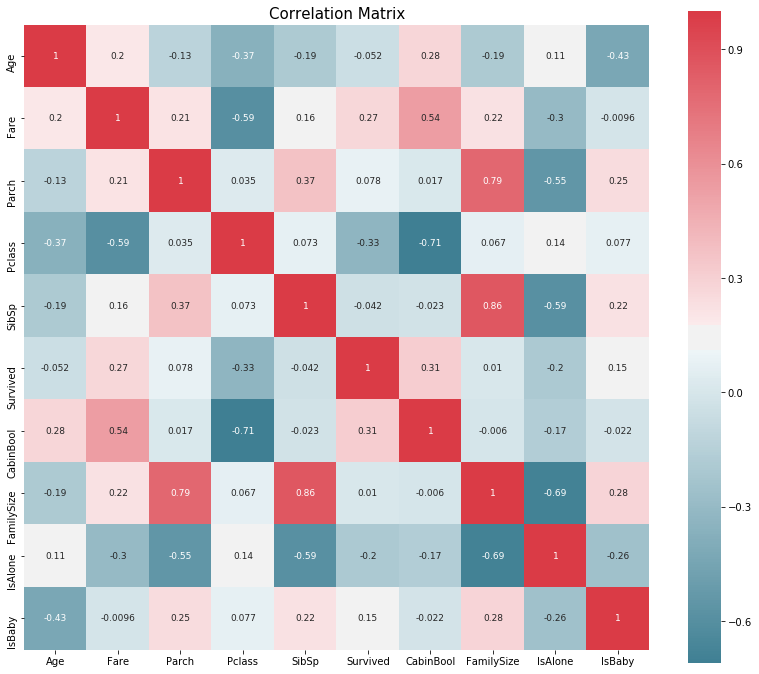

In [63]:
correlation_heatmap(data, 'pearson')

In [64]:
# Drop low corrlations 
to_drop = ['Age', 'AgeBin', 'SibSp', 'Parch', 'FamilySize', 'Embarked', 'Title']
df = df.drop(to_drop, axis=1, inplace=False)

In [65]:
#Check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 8 columns):
Pclass       1300 non-null int64
Sex          1300 non-null object
Survived     882 non-null float64
CabinBool    1300 non-null int64
Deck         1300 non-null object
IsAlone      1300 non-null int64
IsBaby       1300 non-null int64
FareBin      1300 non-null object
dtypes: float64(1), int64(4), object(3)
memory usage: 81.3+ KB


In [66]:
#Check
data.columns

Index(['Age', 'Embarked', 'Fare', 'Name', 'Parch', 'Pclass', 'Sex', 'SibSp',
       'Survived', 'Ticket', 'CabinBool', 'Deck', 'FamilySize', 'IsAlone',
       'AgeBin', 'IsBaby', 'Title', 'FareBin'],
      dtype='object')

# Feature encoding

In [67]:
# Categorical boolean mask
categorical_feature_mask = df.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = df.columns[categorical_feature_mask].tolist()

# import labelencoder
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()

# apply le on categorical feature columns
df[categorical_cols] = df[categorical_cols].apply(lambda col: le.fit_transform(col))
df[categorical_cols].head()

,Sex,Deck,FareBin
0,1,8,2
1,0,2,1
2,0,8,2
3,0,2,1
4,1,8,2


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 18 columns):
Age           1300 non-null int64
Embarked      1300 non-null object
Fare          1300 non-null float64
Name          1300 non-null object
Parch         1300 non-null int64
Pclass        1300 non-null int64
Sex           1300 non-null object
SibSp         1300 non-null int64
Survived      882 non-null float64
Ticket        1300 non-null object
CabinBool     1300 non-null int64
Deck          1300 non-null object
FamilySize    1300 non-null int64
IsAlone       1300 non-null int64
AgeBin        1300 non-null object
IsBaby        1300 non-null int64
Title         1300 non-null object
FareBin       1300 non-null object
dtypes: float64(2), int64(8), object(8)
memory usage: 182.9+ KB


## Model 

In [69]:
#Split data
train = df[:split]
test = df[split:]

# Get variables for a model
x = train.drop(["Survived"], axis=1)
y = train["Survived"]

#Do train data splitting
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

#We will predict this value for a submission
test.drop(["Survived"], axis = 1, inplace=True)

### Train&Score 

In [70]:
MLA = [
    ensemble.AdaBoostClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),
    gaussian_process.GaussianProcessClassifier(),
    linear_model.LogisticRegressionCV(),
    linear_model.RidgeClassifierCV(),
    linear_model.Perceptron(),
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    neighbors.KNeighborsClassifier(),
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    xgb.XGBClassifier()
    ]

In [71]:
#Do some preperation for the loop
col = []
algorithms = pd.DataFrame(columns = col)
idx = 0

#Train and score algorithms
for a in MLA:
    
    a.fit(X_train, y_train)
    pred = a.predict(X_test)
    acc = accuracy_score(y_test, pred) #Other way: a.score(X_test, y_test)
    f1 = f1_score(y_test, pred)
    cv = cross_val_score(a, X_test, y_test).mean()
    
    Alg = a.__class__.__name__
    
    algorithms.loc[idx, 'Algorithm'] = Alg
    algorithms.loc[idx, 'Accuracy'] = round(acc * 100, 2)
    algorithms.loc[idx, 'F1 Score'] = round(f1 * 100, 2)
    algorithms.loc[idx, 'CV Score'] = round(cv * 100, 2)

    idx+=1

In [72]:
#Compare invidual models
algorithms.sort_values(by = ['CV Score'], ascending = False, inplace = True)    
algorithms.head()

,Algorithm,Accuracy,F1 Score,CV Score
16,XGBClassifier,87.57,81.36,84.75
5,LogisticRegressionCV,80.79,76.71,84.21
13,LinearSVC,84.75,79.70,83.60
6,RidgeClassifierCV,82.49,77.70,83.05
2,GradientBoostingClassifier,86.44,79.66,82.53


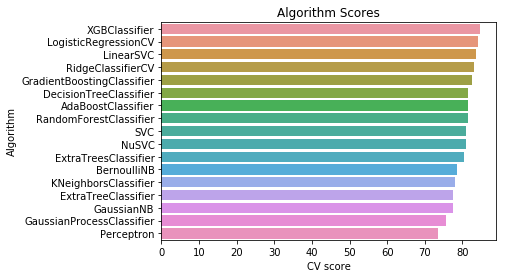

In [73]:
#Plot them
g = sns.barplot("CV Score", "Algorithm", data = algorithms)
g.set_xlabel("CV score")
g = g.set_title("Algorithm Scores")

### Evaluation

### Parameter Tunning

In [74]:
kfold = StratifiedKFold(n_splits=10) #-> library from sklearn.model_selection import StratifiedKFold

In [75]:
# XGBoost Classifier
XGB = XGBClassifier()
xgb_param = {
    'loss' : ["deviance"],
     'n_estimators' : [100,200,300],
     'learning_rate': [0.1, 0.05, 0.01],
     'max_depth': [4, 8],
     'min_samples_leaf': [100,150],
     'max_features': [0.3, 0.1] 
    }

gsXGB = GridSearchCV(XGB, param_grid = xgb_param, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
gsXGB.fit(X_train,y_train)
XGB_best = gsXGB.best_estimator_

# Best score
gsXGB.best_score_

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.9s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   11.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   24.4s
[Parallel(n_jobs=4)]: Done 720 out of 720 | elapsed:   39.1s finished


0.7971631205673759

In [76]:
# SVC Classifier
SVC = svm.SVC(probability=True)
svc_param = {
    'kernel': ['rbf'], 
    'gamma': [ 0.001, 0.01, 0.1, 1],
    'C': [1, 10, 50, 100,200,300, 1000]
    }

gsSVC = GridSearchCV(SVC, param_grid = svc_param, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
gsSVC.fit(X_train,y_train)
SVC_best = gsSVC.best_estimator_

# Best score
gsSVC.best_score_

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 280 out of 280 | elapsed:   10.9s finished


0.8014184397163121

In [77]:
# Gradient Boosting Classifier
GB = ensemble.GradientBoostingClassifier()
gb_param = {
        'loss' : ["deviance"],
        'n_estimators' : [100,200,300],
        'learning_rate': [0.1, 0.05, 0.01],
        'max_depth': [4, 8],
        'min_samples_leaf': [100,150],
        'max_features': [0.3, 0.1] 
        }

gsGB = GridSearchCV(GB, param_grid = gb_param, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
gsGB.fit(X_train,y_train)
GB_best = gsGB.best_estimator_

# Best score
gsGB.best_score_

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    2.6s
[Parallel(n_jobs=4)]: Done 376 tasks      | elapsed:   12.4s
[Parallel(n_jobs=4)]: Done 720 out of 720 | elapsed:   24.0s finished


0.7815602836879433

### Model Assembly 

In [78]:
vc = ensemble.VotingClassifier(
    estimators = [('xgb', XGB_best), ('gbc',GB_best), ('svc', SVC_best)],
    voting='soft', n_jobs=4)

In [79]:
vc = vc.fit(X_train, y_train)
pred = vc.predict(X_test)
acc = accuracy_score(y_test, pred) #Other way: vc.score(X_test, y_test)
f1 = f1_score(y_test, pred)
cv = cross_val_score(vc, X_test, y_test).mean()

print("Accuracy: ", round(acc*100,2), "\nF1-Score: ", round(f1*100,2), "\nCV Score: ", round(cv*100,2))

Accuracy:  85.88 
F1-Score:  78.63 
CV Score:  81.4


In [80]:
ada = ensemble.AdaBoostClassifier()
ada.fit(X_train, y_train)

lg = linear_model.LogisticRegressionCV()
lg.fit(X_train, y_train)

vc2 = ensemble.VotingClassifier(
    estimators = [('ada', ada), ('lg',lg), ('VotingClassifier', vc)],
    voting='soft', n_jobs=4)
vc2.fit(X_train, y_train)

VotingClassifier(estimators=[('ada',
                              AdaBoostClassifier(algorithm='SAMME.R',
                                                 base_estimator=None,
                                                 learning_rate=1.0,
                                                 n_estimators=50,
                                                 random_state=None)),
                             ('lg',
                              LogisticRegressionCV(Cs=10, class_weight=None,
                                                   cv='warn', dual=False,
                                                   fit_intercept=True,
                                                   intercept_scaling=1.0,
                                                   l1_ratios=None, max_iter=100,
                                                   multi_class='warn',
                                                   n_jobs=None, penalty='l2',
                                                   random

### AUROC 

#### Curve 

In [81]:
y_scores = vc2.predict_proba(X_test)
y_scores = y_scores[:,1]

In [82]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_scores)

In [83]:
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

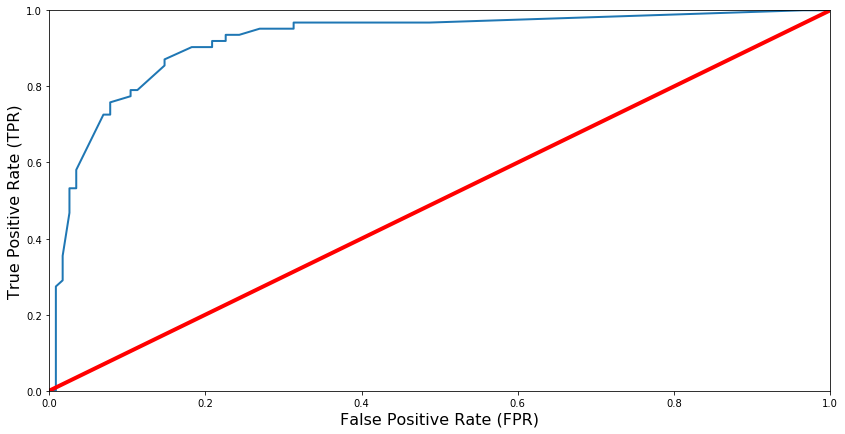

In [84]:
plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)

#### Score 

In [85]:
auroc = roc_auc_score(y_test, y_scores)
print("ROC-AUC Score:", auroc)

ROC-AUC Score: 0.9214586255259467


## Submission

In [86]:
pred = vc2.predict(test).astype(int)
target = pd.Series(pred, name='Survived')

output = pd.concat({'PassengerId':Id, 'Survived':target}
                   ,axis='columns')

output.to_csv('submission.csv', index=False, header=True)

### **If you like the notebook, please up-vote!**